# Introduction

## Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# We can use the pandas library in python to read in the csv file.
import pandas as pd

#for numerical computaions we can use numpy library
import numpy as np

## Load train & test data

In [3]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("/Users/jayden.yoo/Downloads/train (2).csv")

In [4]:
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test = pd.read_csv("/Users/jayden.yoo/Downloads/test (1).csv")

In [6]:
#transpose
titanic_test.head().T
#note their is no Survived column here which is our target varible we are trying to predict

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [7]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [8]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
#lets see if there are any more columns with missing values 
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### yes even Embarked and cabin has missing values.

In [12]:
#how about test set??
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Age, Fare and cabin has missing values. we will see how to fill missing values next.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

## Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11564b320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117cc3cc0>]], dtype=object)

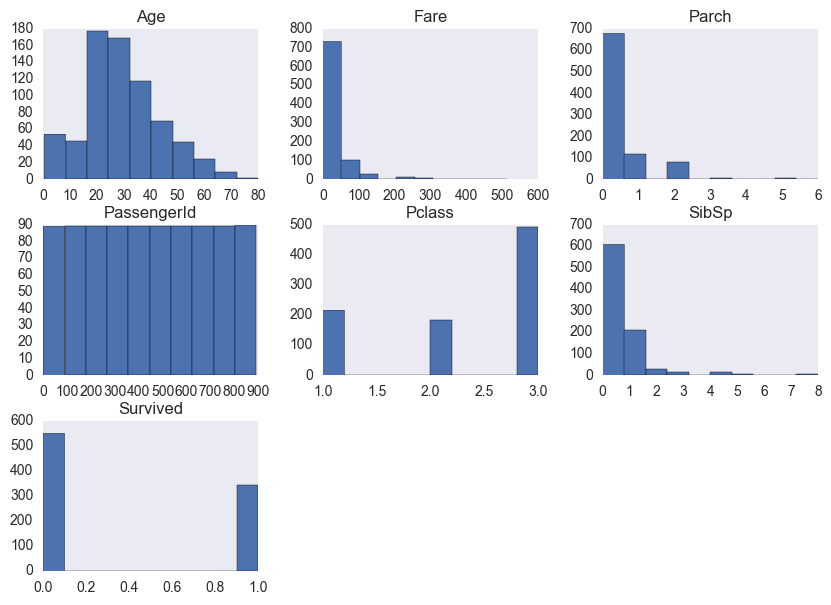

In [14]:
titanic.hist(bins=10,figsize=(10,7),grid=False)

##### we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

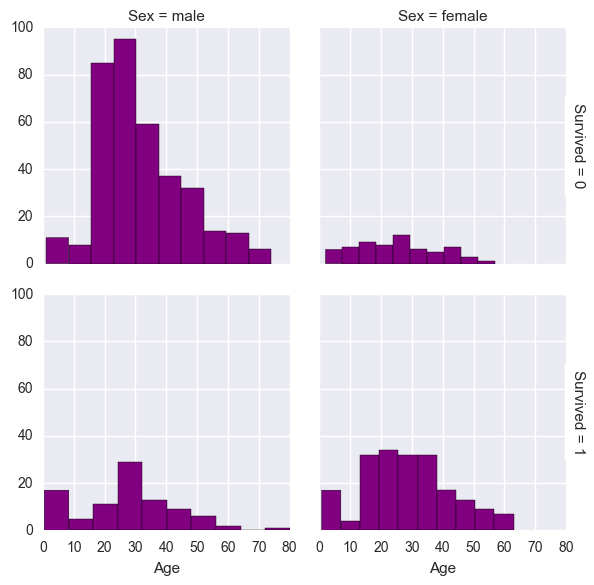

In [15]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age", color="purple")

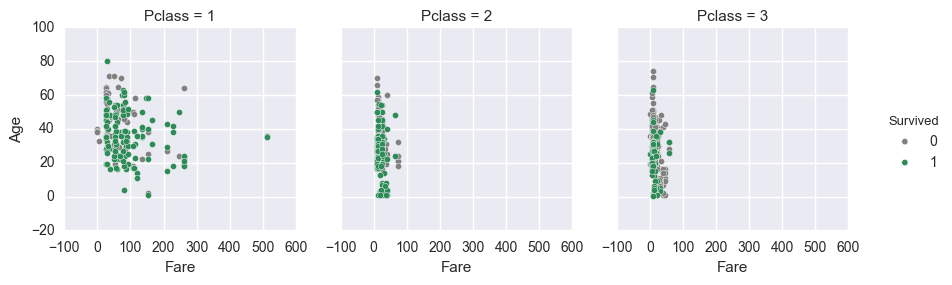

In [16]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()

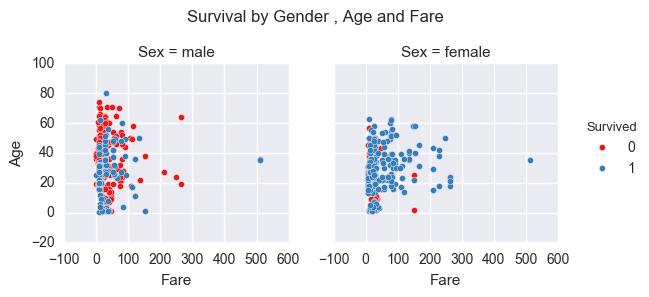

In [17]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1")
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

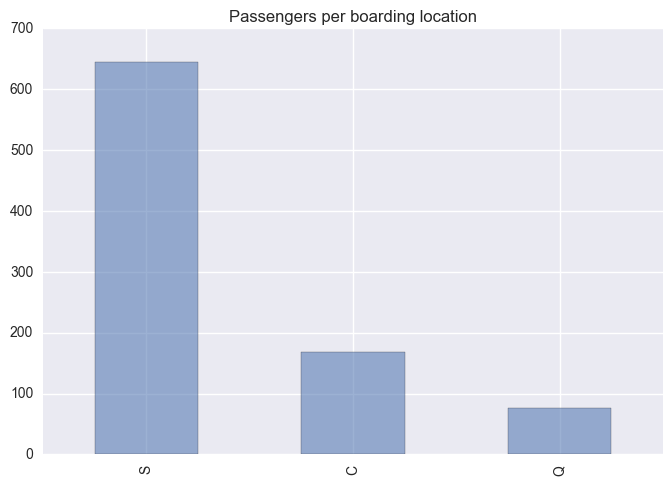

In [18]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location")

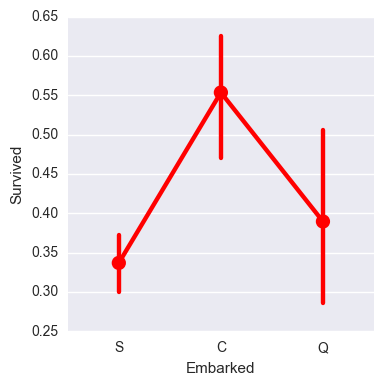

In [19]:
sns.factorplot(x = 'Embarked',y="Survived", data = titanic,color="r")

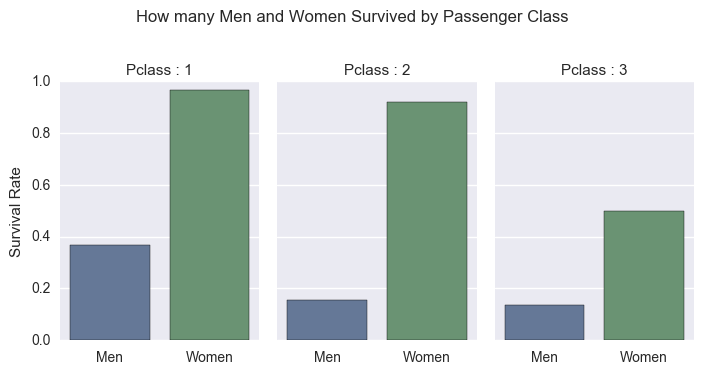

In [20]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_var} : {col_name}")
    )  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')

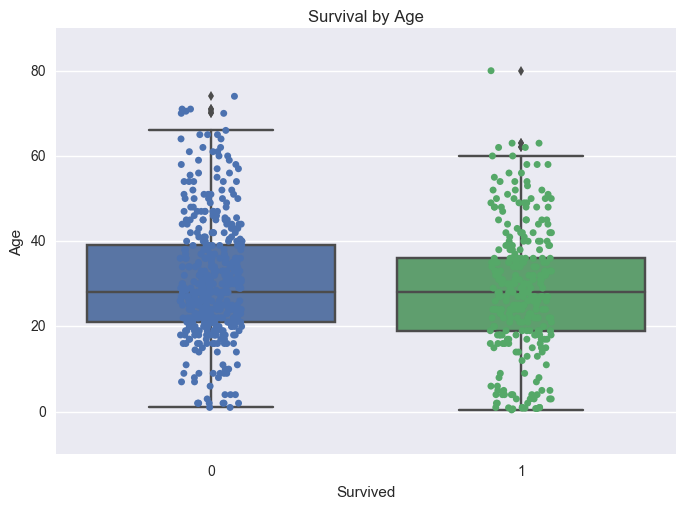

In [21]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="w")
sns.plt.title("Survival by Age",fontsize=12)

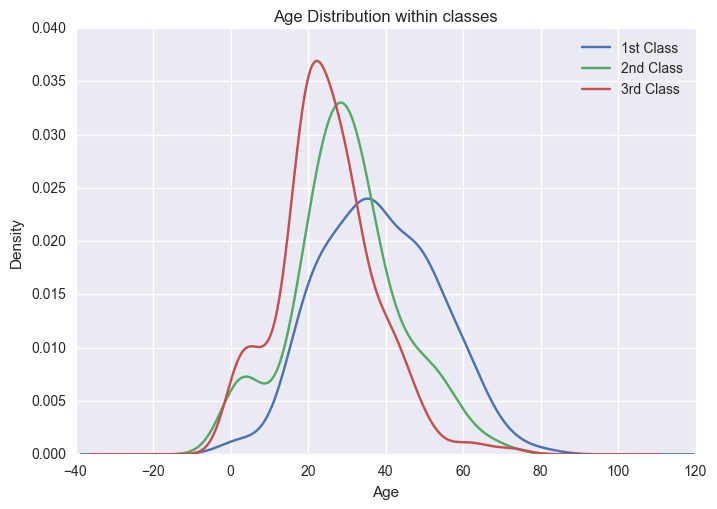

In [22]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
# plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

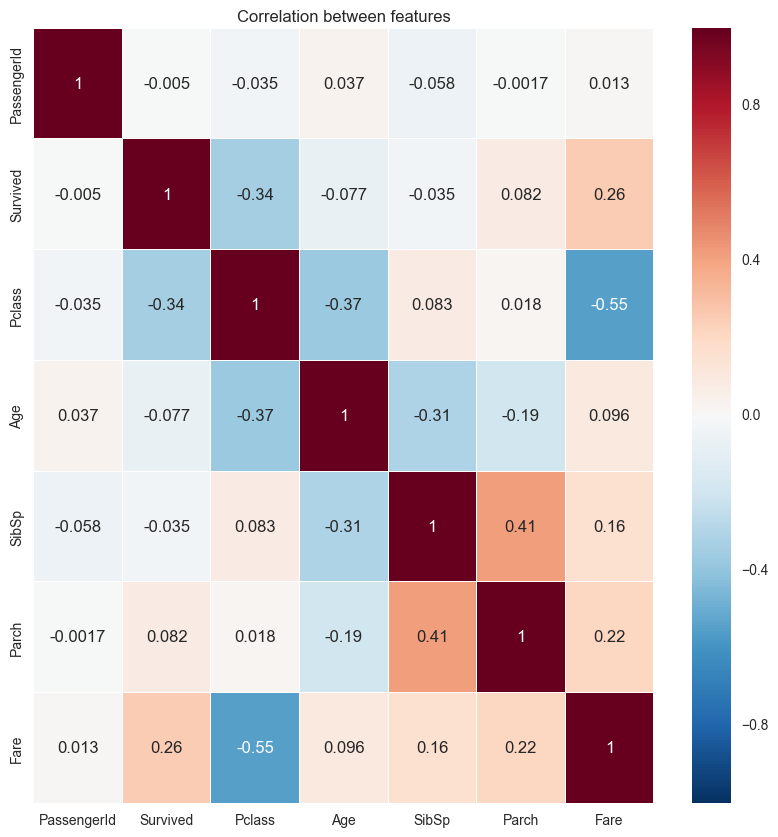

In [23]:
corr=titanic.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, linewidths=0.01, linecolor="white", annot=True)
plt.title('Correlation between features')

In [24]:
#correlation of features with target variable
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

##### Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age

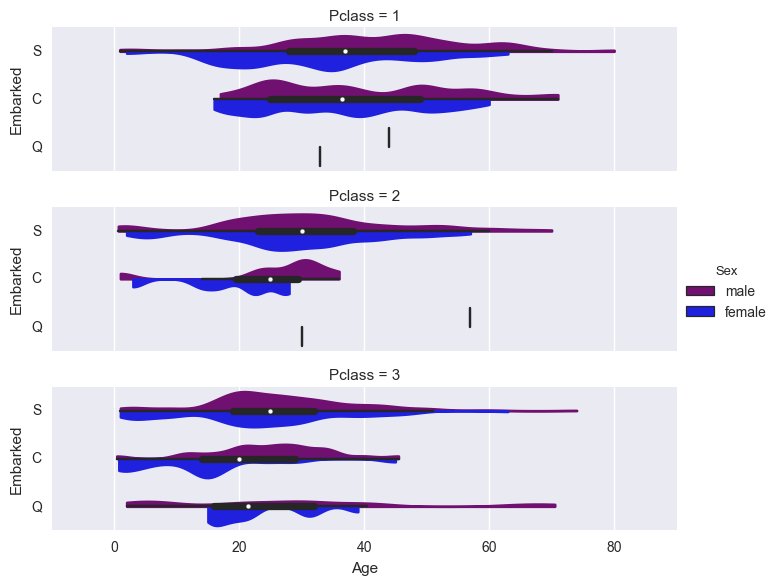

In [25]:
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2)

## Missing Value Imputation

### Embarked Column

In [26]:
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


PassengerId 62 and 830 have missing embarked values
Both have Passenger class 1 and fare $80.
Lets plot a graph to visualize and try to guess from where they embarked

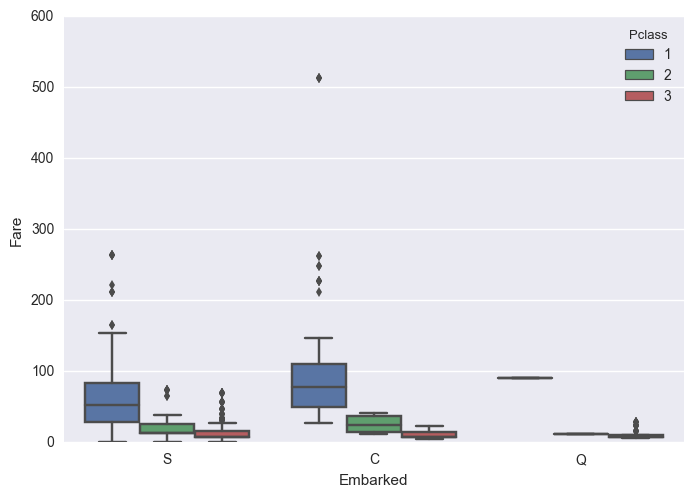

In [27]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)

We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

In [28]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')

In [29]:
#there is an empty fare column in test set
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Fare Column

In [30]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
#print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

## Feature Engineering

### Deck- Where exactly were passenger on the ship?

In [36]:
titanic.Cabin.head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [32]:
titanic["Deck"]=titanic.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

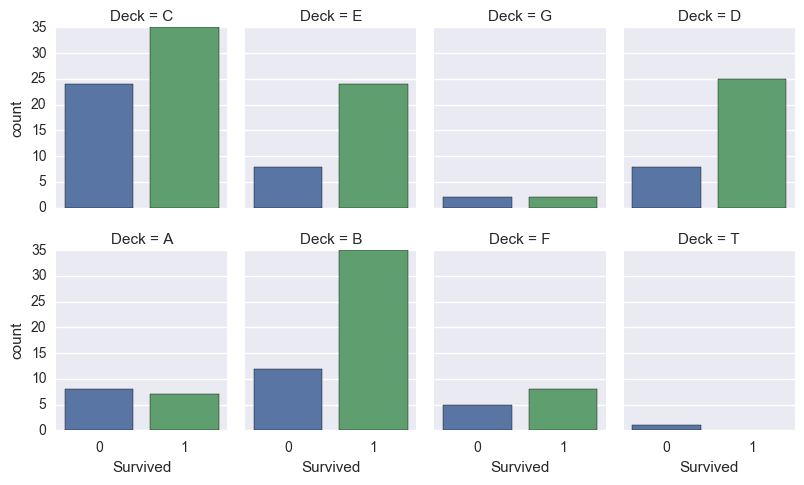

In [37]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8)

In [44]:
titanic.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanic["Deck"].unique() # Z is for null values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

### How Big is your family?

In [45]:
# Create a family size variable including the passenger themselves
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [46]:
# Discretize family size
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['singleton' 'small' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


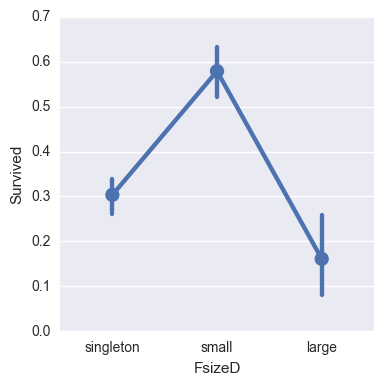

In [47]:
sns.factorplot(x="FsizeD", y="Survived", data=titanic)

## Convert Categorical variables into Numerical ones

In [48]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"FsizeD",'Deck']
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD
475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,2,0,1,1
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,A31,0,0,1,1
583,584,0,1,"Ross, Mr. John Hugo",1,36.0,0,0,13049,40.1250,A10,0,0,1,1
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,2,0,3,2
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,0,0,1,1


### Age Column

Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.
We will use Random Forest algorithm to predict ages.

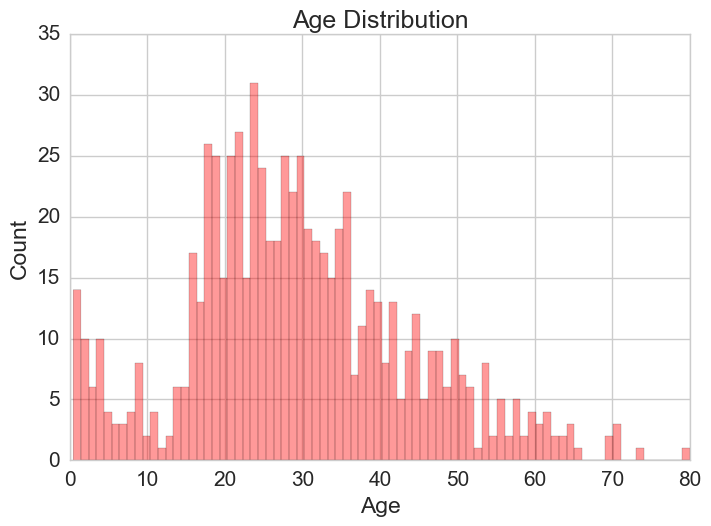

In [49]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [50]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                'Pclass','FamilySize',
                 'FsizeD','Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [51]:
titanic=fill_missing_age(titanic)
titanic_test=fill_missing_age(titanic_test)

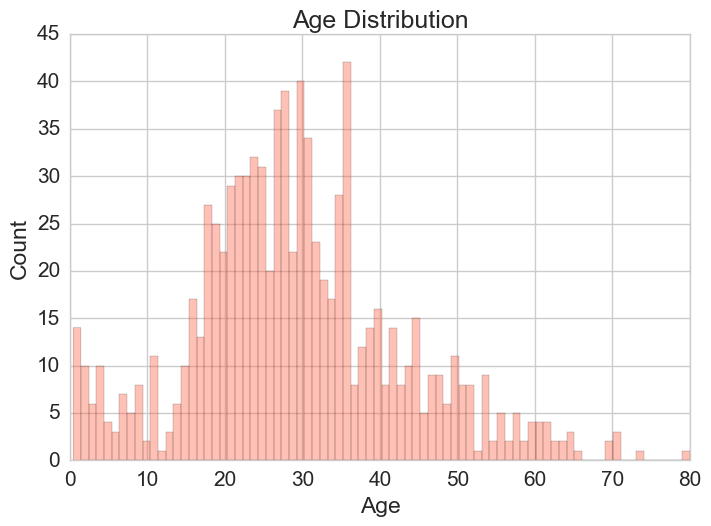

In [52]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((0,80));

## Correlation of features with target

In [58]:
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.052607
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.174199
Deck          -0.301116
FamilySize     0.016639
FsizeD         0.283810
Name: Survived, dtype: float64

# Predict Survival

## Linear Regression

In [62]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","FsizeD", "Deck"]
target="Survived"
# Initialize our algorithm class
alg = LinearRegression()

# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []

In [63]:
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic[target].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [64]:
predictions = np.concatenate(predictions, axis=0)
# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0


accuracy=sum(titanic["Survived"]==predictions)/len(titanic["Survived"])
accuracy

0.8058361391694725